In [1]:
using Gadfly
using DataFrames
using Distributions
using Compose

INFO: Precompiling module Compose.
INFO: Recompiling stale cache file C:\Users\pkillewald\.julia\lib\v0.6\Gadfly.ji for module Gadfly.


In [2]:
function simulate(n::Int, p_occupied::Number, p_conscious::Number)
    occupied = rand(Bool, n)
    sgn = falses(n)
    
    r = rand(Float64, n)
    conscious = (r .< p_conscious)
    occed = (r .< p_conscious + p_occupied) .& .~conscious
    
    if occupied[1] && (conscious[1] || occed[1])
        sgn[1] = true
    end
    
    for i in 2:n
        if occupied[i] && (conscious[i] || occed[i])
            sgn[i] = true
        elseif ~occupied[i] && conscious[i-1]
            sgn[i] = false
        else
            sgn[i] = sgn[i-1]
        end
    end
    return (occupied, sgn, r, conscious, occed)
end         

simulate (generic function with 1 method)

In [3]:
N = 1000000
M = 100
occ_given_occ = zeros(Float64, M)
occ_given_upper = zeros(Float64, M)
occ_given_lower = zeros(Float64, M)
vac_given_vac = zeros(Float64, M)
vac_given_upper = zeros(Float64, M)
vac_given_lower = zeros(Float64, M)
X = collect(float(linspace(0, 2//3, M)))
target_x = findfirst(x -> x>=1//3, X)
for (i, p) in enumerate(X)
    occ, sgn = simulate(N, float(1//3), p)
    
    occ_bin = Binomial(N, sum(occ .& sgn) / N)
    occ_given_occ[i] = mean(occ_bin) / N
    occ_given_upper[i] = quantile(occ_bin, .9) / N
    occ_given_lower[i] = quantile(occ_bin, .1) / N
    
    vac_bin = Binomial(N, sum(.~occ .& .~sgn) / N)
    vac_given_vac[i] = mean(vac_bin) / N
    vac_given_upper[i] = quantile(vac_bin, .9) / N
    vac_given_lower[i] = quantile(vac_bin, .1) / N
end

In [4]:
df1 = DataFrame(x=X, y=occ_given_occ, yu=occ_given_upper, yl=occ_given_lower, t=repeat(["p(Occ|S=Occ)"], outer=[M]))
append!(df1, DataFrame(x=X, y=vac_given_vac, yu=vac_given_upper, yl=vac_given_lower, t=repeat(["p(Vac|S=Vac)"], outer=[M])))

,x,y,yu,yl,t
1,0.0,0.499448,0.500089,0.498807,p(Occ|S=Occ)
2,0.006734006734006735,0.494335,0.494976,0.493694,p(Occ|S=Occ)
3,0.01346801346801347,0.487053,0.487694,0.486412,p(Occ|S=Occ)
4,0.0202020202020202,0.483023,0.483663,0.482383,p(Occ|S=Occ)
5,0.02693602693602694,0.479014,0.479654,0.478374,p(Occ|S=Occ)
6,0.03367003367003367,0.472459,0.473099,0.471819,p(Occ|S=Occ)
7,0.0404040404040404,0.469848,0.470488,0.469208,p(Occ|S=Occ)
8,0.04713804713804713,0.464737,0.465376,0.464098,p(Occ|S=Occ)
9,0.05387205387205388,0.460588,0.461227,0.459949,p(Occ|S=Occ)
10,0.06060606060606061,0.458264,0.458903,0.457625,p(Occ|S=Occ)


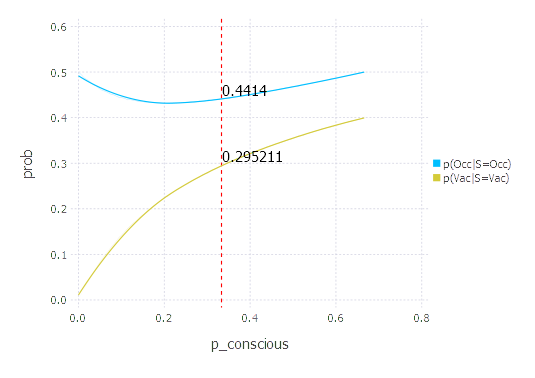

In [5]:
myplot = plot(df1, x=:x, y=:y, color=:t, ymin=:yl, ymax=:yu, xintercept=[1//3],
    Geom.smooth,
    Geom.ribbon,
    Geom.vline(color=[colorant"red"], style=[[1mm, 1mm]]),
    Guide.xlabel("p_conscious"), Guide.ylabel("prob"), Guide.colorkey(""),
    Scale.x_continuous(minvalue=0, maxvalue=2/3),
    Guide.annotation(
         compose(context(), text(1//3, occ_given_occ[target_x], string(occ_given_occ[target_x])))),
    Guide.annotation(
         compose(context(), text(1//3, vac_given_vac[target_x], string(vac_given_vac[target_x]))))
)

In [10]:
draw(PNG("solution.png", 5inch, 4inch), myplot)